# 04 텍스트 마이닝 ①: 웹 크롤링(Web Crawling)_Melon 학습 자료(2022. 11. 15.(화))

<span style="color:red"><strong>
    ※ 무단 배포, 공유, 수정, 편집 금지 ⓒ선한빛
        </strong></span>

### 1. 웹 크롤링(web crawling)이란?
#### 1) 정의

<p>● <span style='background-color: #fff5b1'>웹 페이지에 있는 정보</span>를 가지고 오는 것</p>

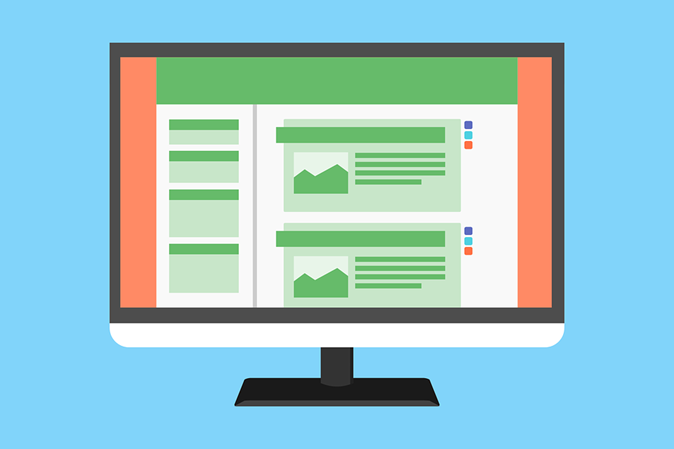

#### 2) 주의 사항

<p>● 짧은 시간 동안 특정 웹 사이트에서 많은 데이터를 수집하는 것은 <span style='background-color: #fff5b1'>디도스(DDos) 공격으로 감지될 수 있음.</span></p>

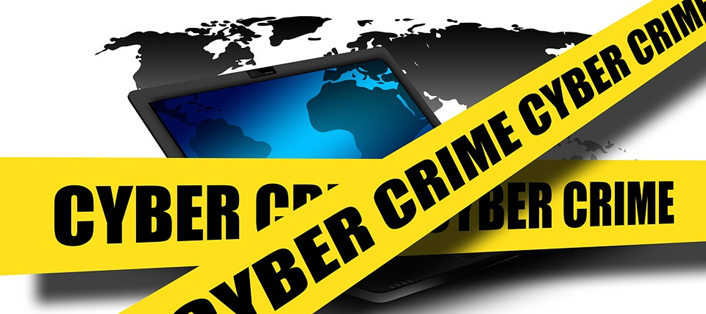

#### 3) 도구
    
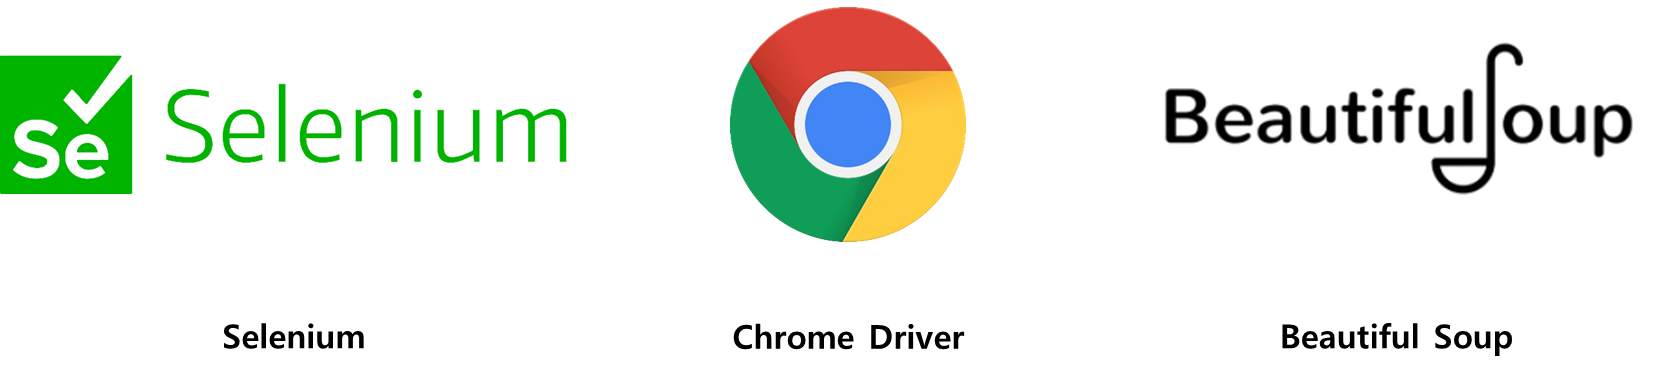
<p>● Selenium: 브라우저를 프로그램이 제어하는 기능을 제공하는 패키지</p>
<p>● Chrome Driver: Selenium을 사용해 Chrome에서 웹 자동화를 하기 위해 필요한 드라이버</p>
<p>● Beautiful Soup: HTML과 XML 문서에서 원하는 정보를 쉽게 추출할 수 있도록 도와주는 모듈들을 모아 놓은 파이썬 패키지</p>

### 2. Melon 노래 순위 정보 크롤링
#### 1) 크롤링 환경 설정
<span style="color:#0000ff">1단계. 크롬 드라이버(Chrome Driver) 실행</span>

In [3]:
from selenium import webdriver #from 모듈 이름 import 모듈 함수
driver=webdriver.Chrome("C:\Temp\chromedriver\chromedriver.exe") #chromedriver가 설치된 폴더의 위치를 경로로 설정해야 함.

<span style="color:#0000ff">2단계. Melon 멜론 차트 Top100 웹 페이지 접속</span>

In [4]:
#방법 1
url='https://www.melon.com/chart/index.htm' #url이 열리지 않을 경우 https://www.melon.com/index.htm로 수정해서 들어가면 됨.
driver.get(url)

In [ ]:
#방법 2
driver.get('https://www.melon.com/chart/index.htm')#url이 열리지 않을 경우 https://www.melon.com/index.htm로 수정해서 들어가면 됨.

<span style="color:#0000ff">3단계. HTML 다운로드 및 BeautifulSoup으로 읽기</span>

In [5]:
from bs4 import BeautifulSoup #from 모듈 이름 import 모듈 함수
html=driver.page_source
soup=BeautifulSoup(html, 'html.parser') #html 객체에 저장한 자료에서 정보를 쉽게 추출할 수 있는(parsing) 형태로 변환

#### 2) Melon 웹 사이트에서 HTML 태그 찾기
<p>● 전체 태그 중 첫 번째 태그의 정보를 먼저 출력</p>
<p>● <span style="color:red">첫 번째 정보의 코드를 기준으로 범위를 확장</span>해 정보를 얻는 방식</p>
<p>● <span style='background-color: #fff5b1'>for문을 사용</span>해 TOP100에 올라온 노래 전체의 정보를 얻음.</p>
<p>● 수집할 노래의 정보는 웹 페이지에서 선별(노래 제목, 가수 이름, 앨범 이름, 좋아요 등)</p>

##### (1) '노래' 태그(song)
<span style="color:#0000ff">1단계. '노래' 태그 100개 찾기</span>
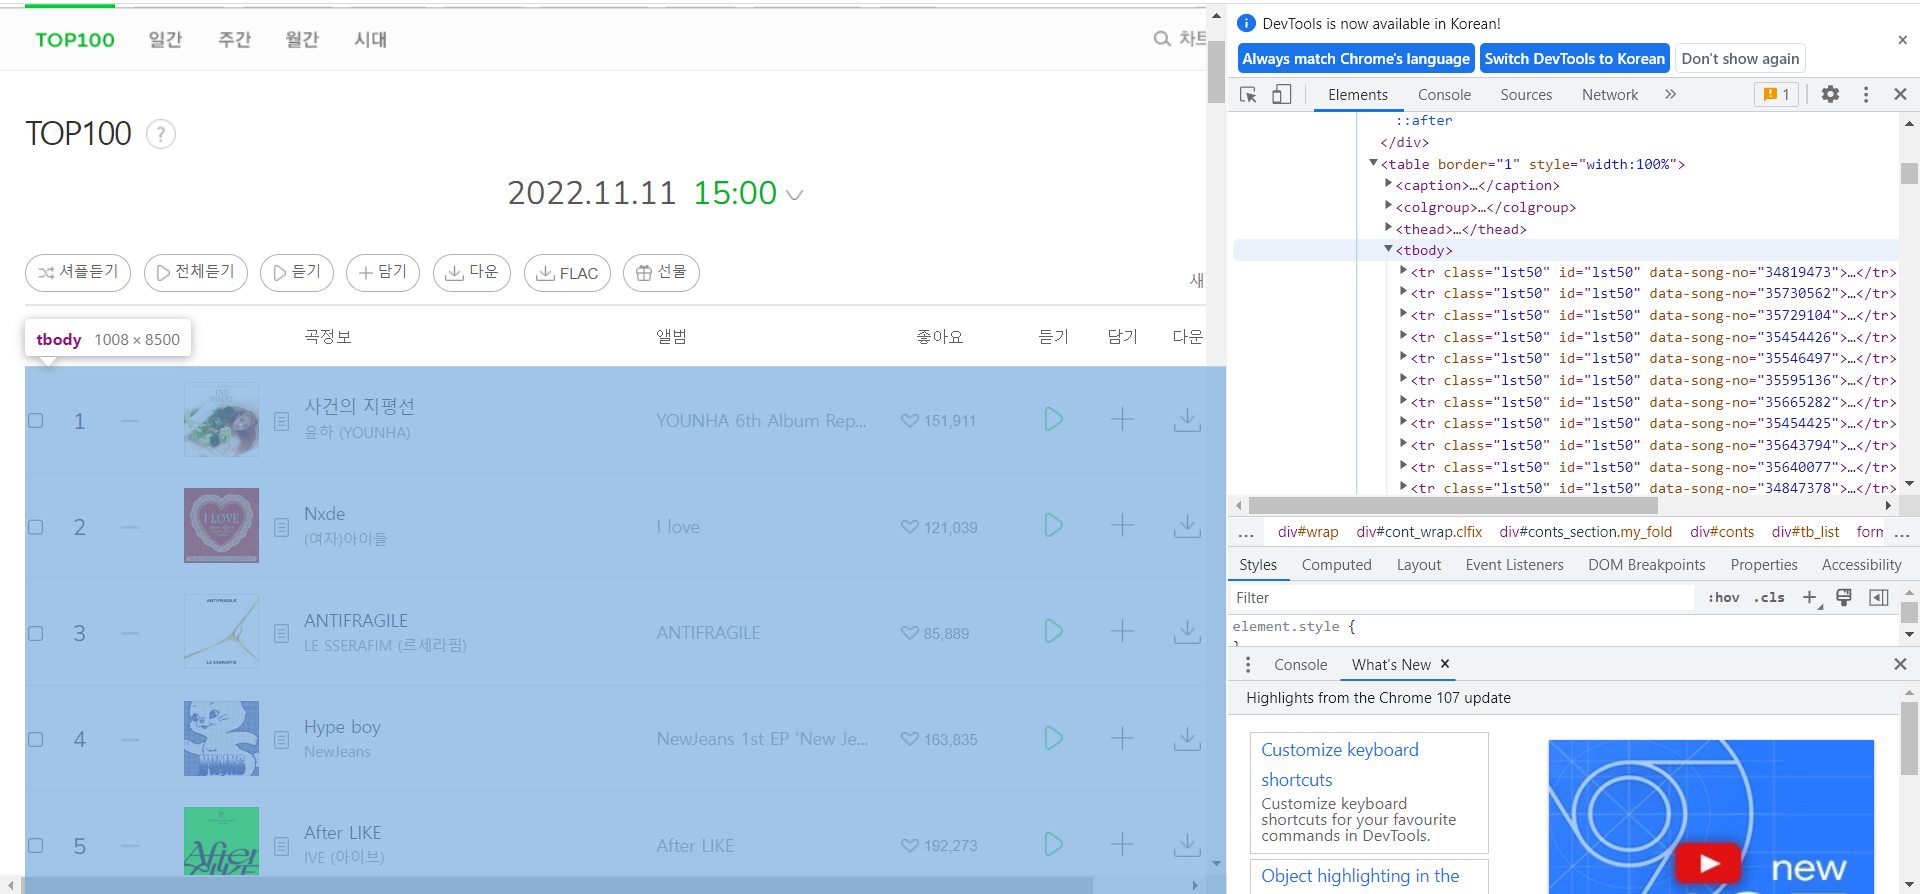

In [6]:
songs=soup.select('table>tbody>tr') #frm > div > table > tbody
print(len(songs)) #위의 조건을 만족하는 태그 정보의 개수 출력
print(songs[0]) #위의 조건을 만족하는 태그 정보 중 인덱스 0번의 html 코드 출력

100
<tr class="lst50" data-song-no="34819473" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="사건의 지평선 곡 선택" type="checkbox" value="34819473"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10903868');" title="YOUNHA 6th Album Repackage 'END THEORY : Final Edition'">
<img alt="YOUNHA 6th Album Repackage 'END THEORY : Final Edition' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/109/03/868/10903868_20220330103544_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>


<span style="color:#0000ff">2단계. 첫 번째 '노래' 태그 지정하기</span>

In [7]:
song=songs[0]

##### (2) '노래 제목' 태그(title)
<span style="color:#0000ff">1단계. 첫 번째 '노래' 태그에서 조건을 만족하는 제목의 개수 찾기</span>
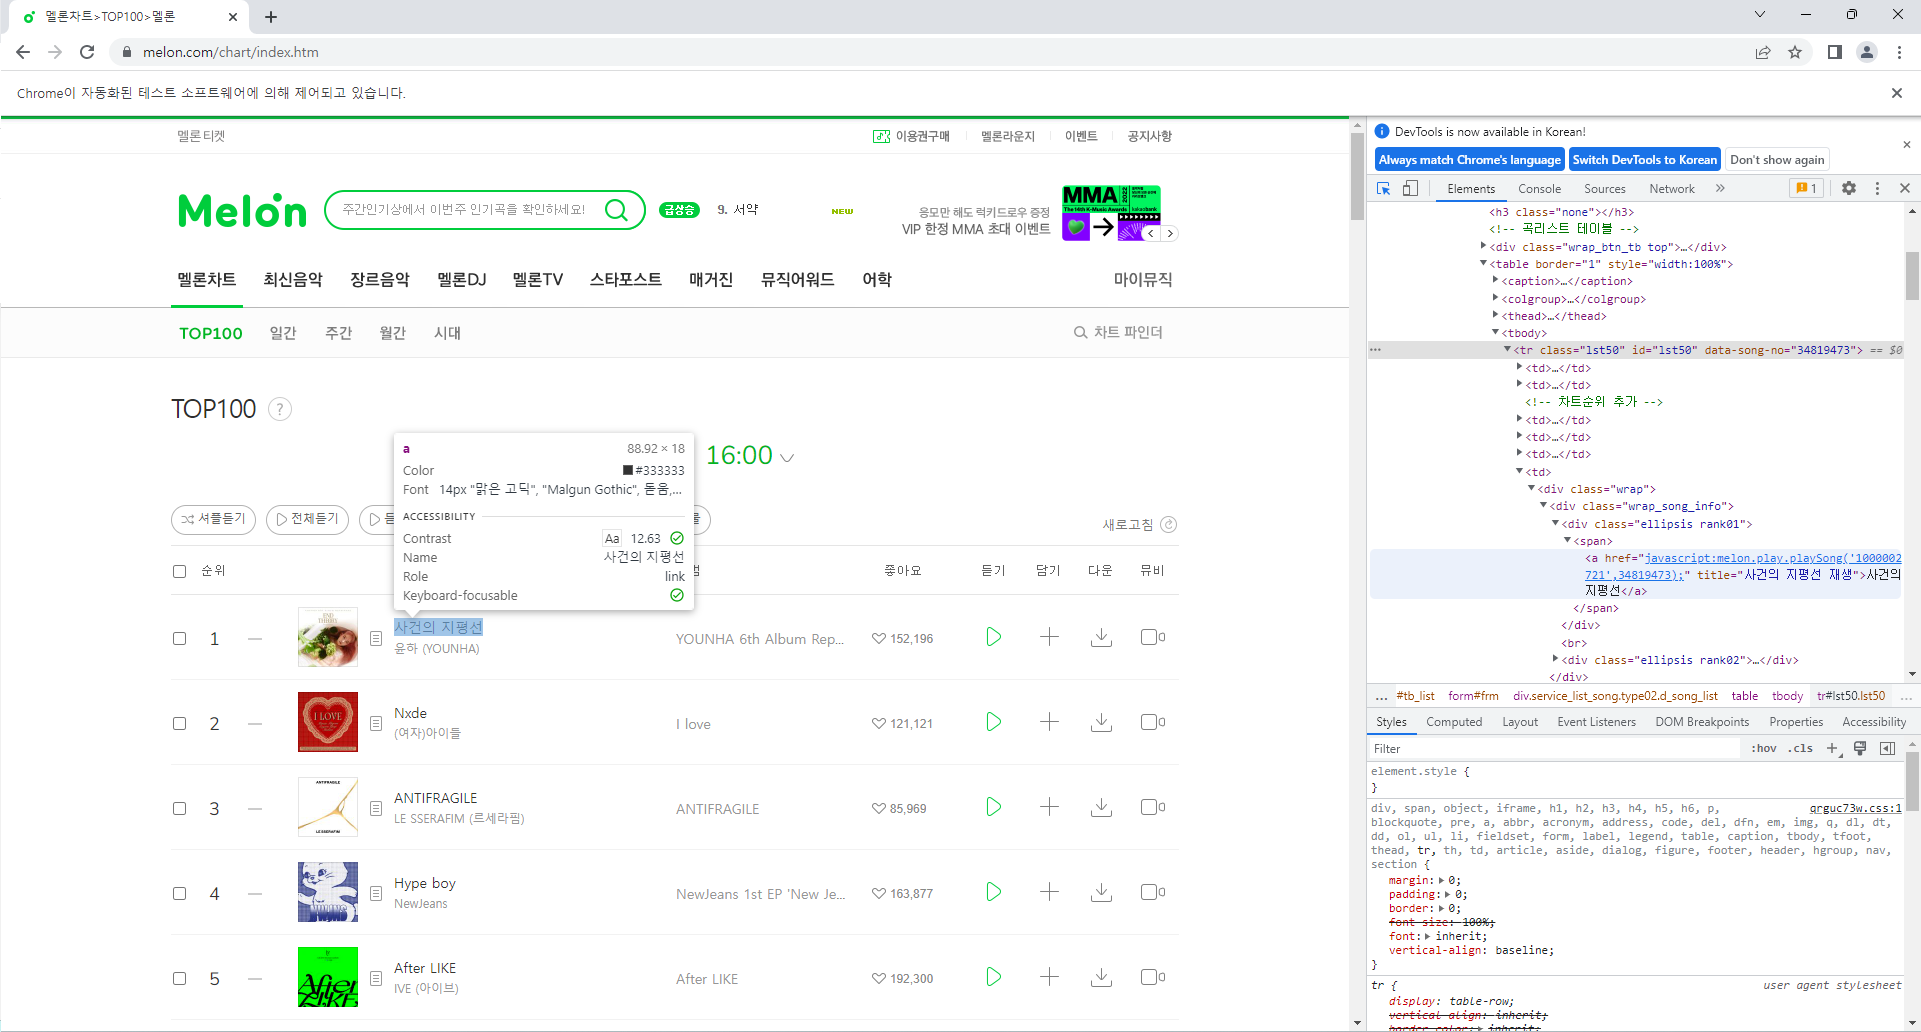

In [8]:
title=song.select('a')
#노래 제목이 a라는 태그를 가지고 있기 때문에 이 조건을 만족한 것을 title로 설정
print(len(title))

6


<span style="color:#0000ff">2단계. 조건을 추가해 제목의 개수 찾기</span>

In [9]:
title=song.select('span>a')
    #노래 제목이 a라는 태그를 가지고 있기 때문에 이 조건을 만족한 것을 title로 설정
print(len(title))

2


<span style="color:#0000ff">3단계. 조건을 한번 더 추가해 제목의 개수 찾기</span>

In [10]:
title=song.select('div.ellipsis.rank01>span>a')
#첫 번째 곡의 코드를 가지고 와야 하기 때문에 만족하는 제목의 수가 1이 나올 때까지 조건을 추가
print(len(title)) #lst50 > td:nth-child(6) > div > div > div.ellipsis.rank01

1


<span style="color:#0000ff">4단계. 모든 조건을 만족하는 노래의 제목 가져오기</span>

In [11]:
title=song.select('div.ellipsis.rank01>span>a')[0].text
#원하는 조건의 정보를 text로 출력
#.select()는 조건에 해당하는 데이터를 모두 선택하기 때문에 인덱스 번호를 설정해야 함.
print(title)

사건의 지평선


##### (3) '가수 이름' 태그(singer)
<span style="color:#0000ff">1단계. 첫 번째 '노래' 태그에서 조건을 만족하는 가수 이름의 개수 찾기</span>
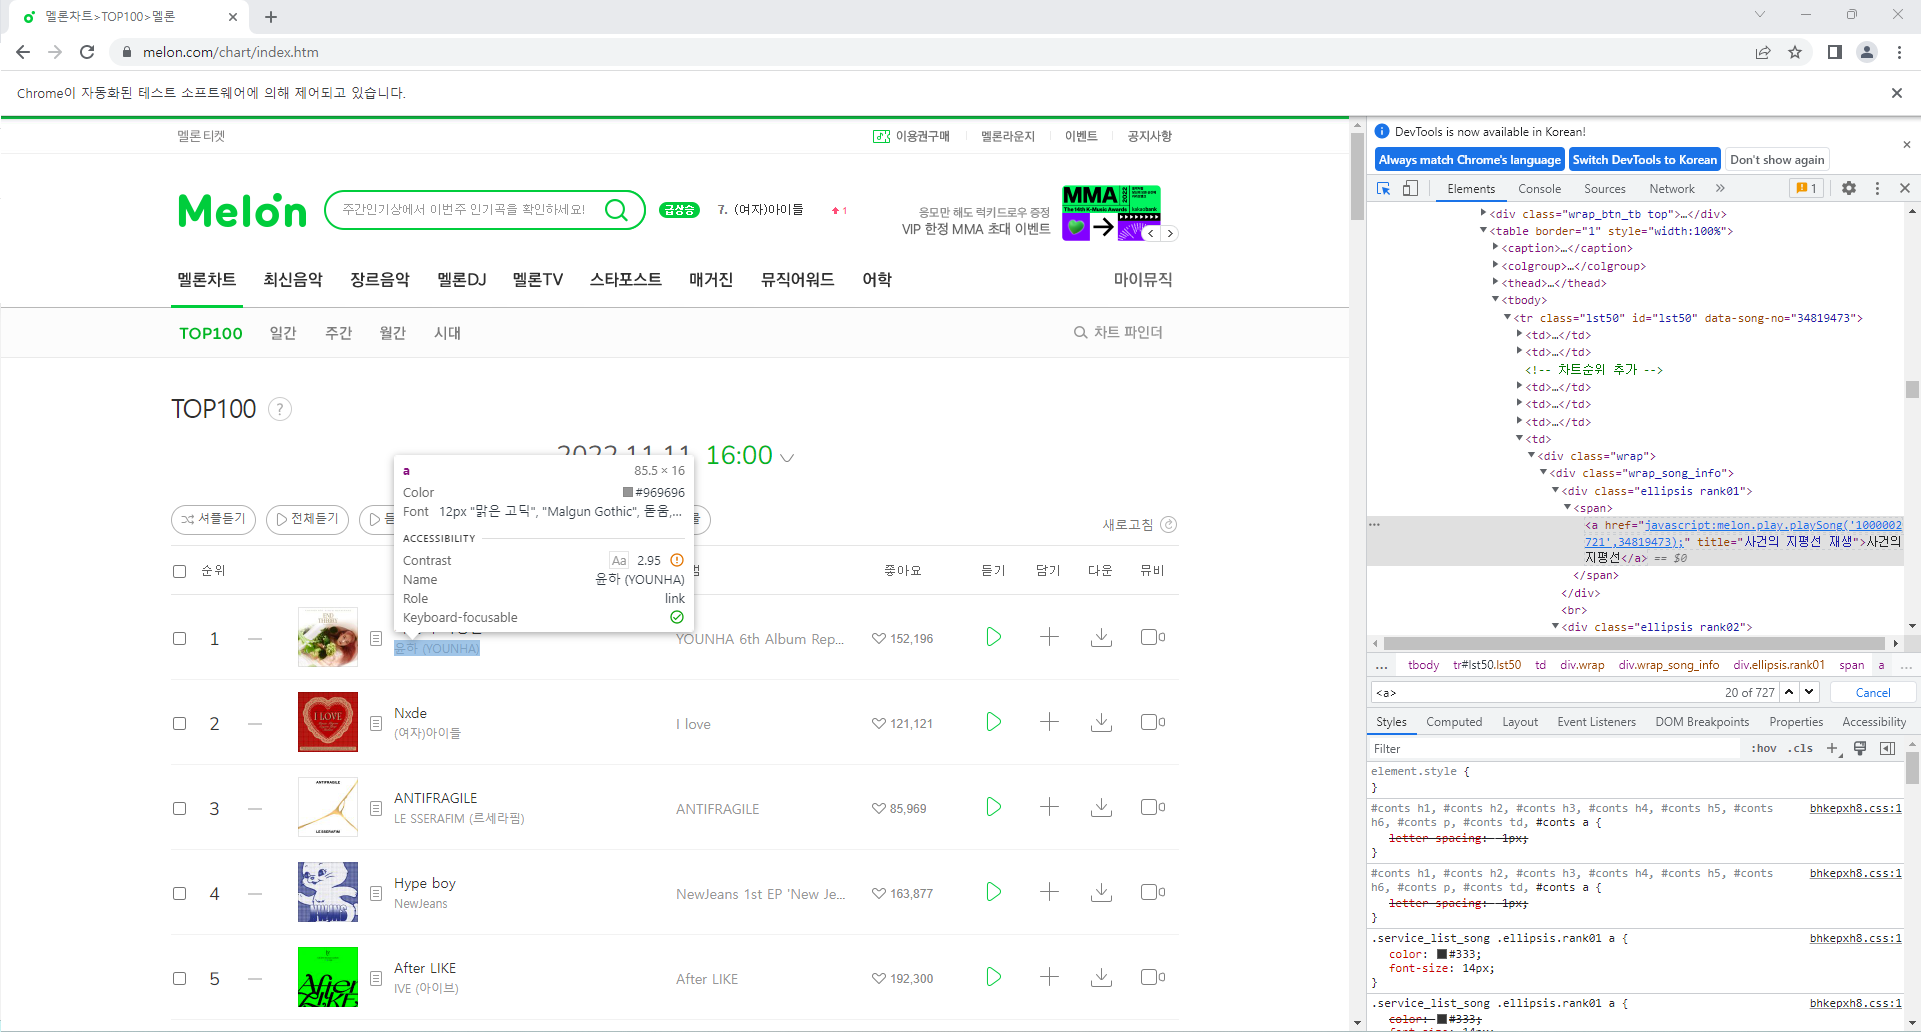

In [12]:
singer=song.select('div.ellipsis.rank02>a')
print(len(singer))

1


<span style="color:#0000ff">2단계. 조건을 만족하는 가수 이름 가져오기</span>

In [13]:
singer=song.select('div.ellipsis.rank02>a')[0].text
print(singer)

윤하 (YOUNHA)


##### (4) '앨범 이름' 태그(album)
<span style="color:#0000ff">1단계. 첫 번째 '노래' 태그에서 조건을 만족하는 제목의 개수 찾기</span>
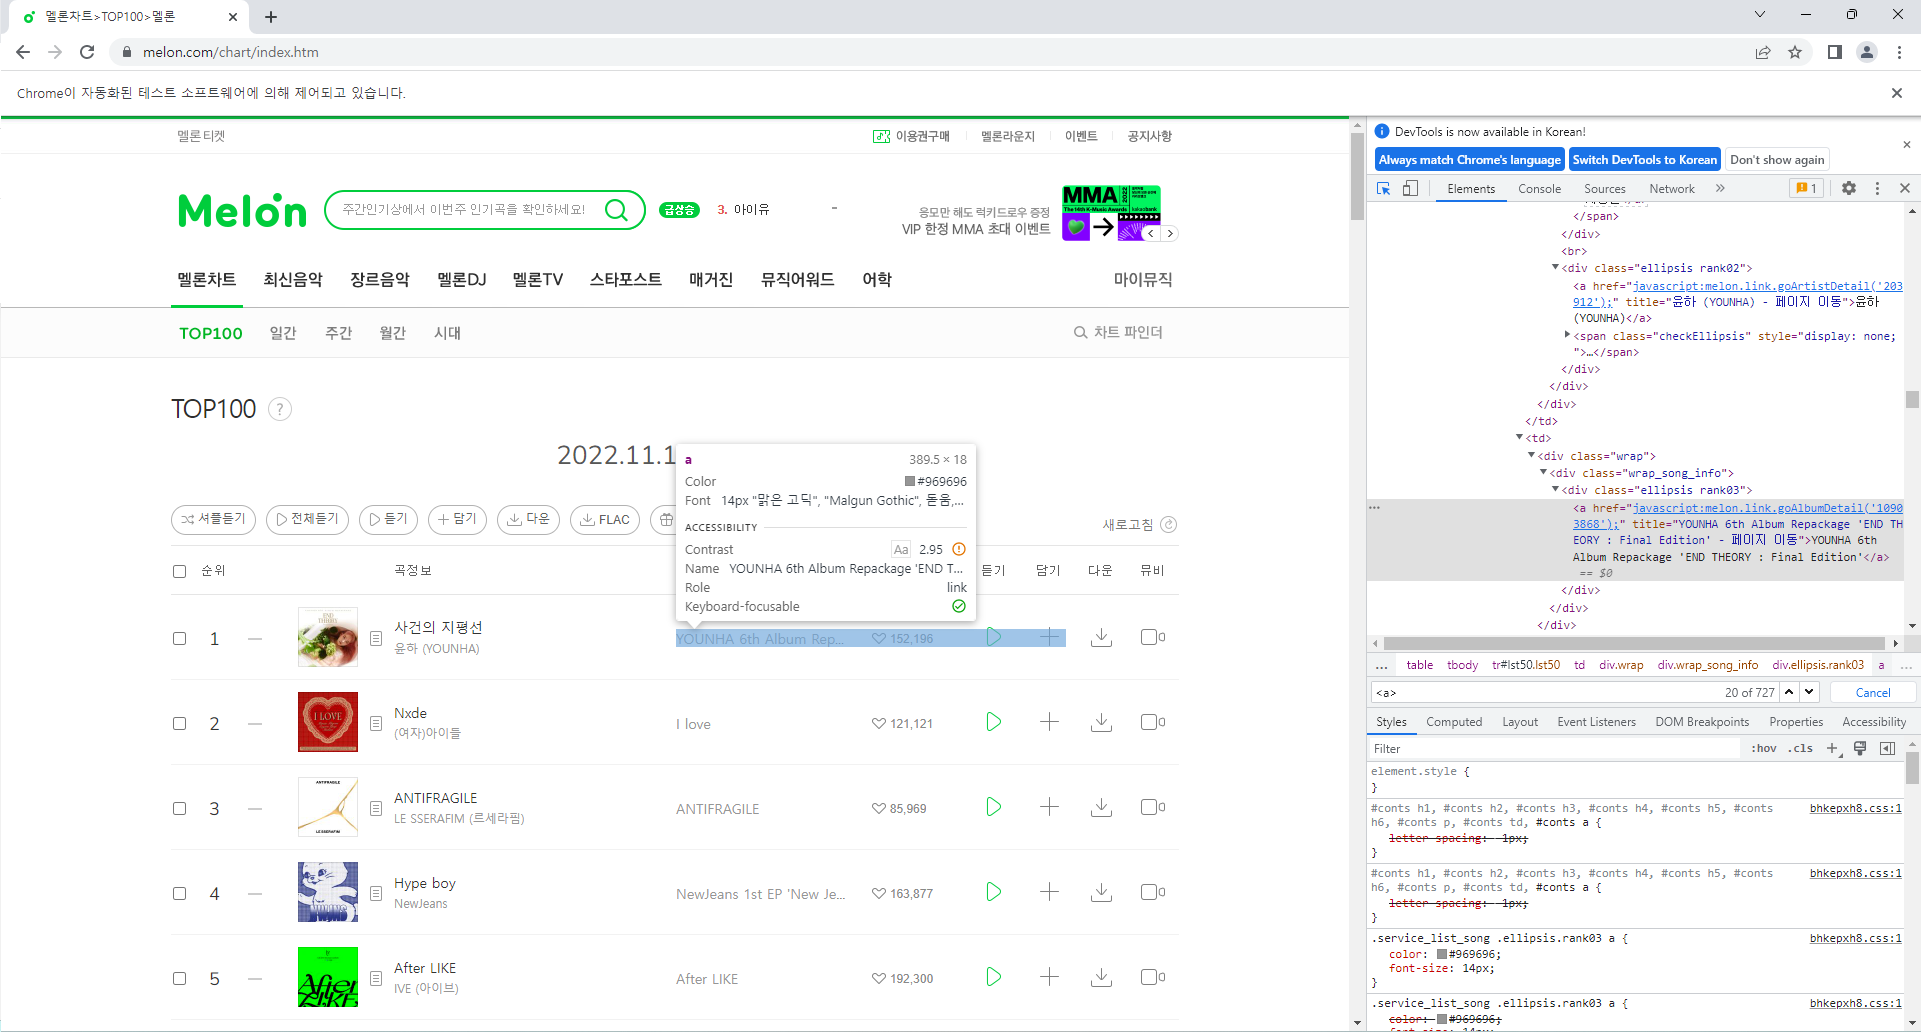

In [14]:
album=song.select('div.ellipsis.rank03>a')
print(len(album))

1


<span style="color:#0000ff">2단계. 조건을 만족하는 앨범 이름 가져오기</span>

In [15]:
album=song.select('div.ellipsis.rank03>a')[0].text
print(album)

YOUNHA 6th Album Repackage 'END THEORY : Final Edition'


#### 3) Melon TOP100 노래 순위 정보를 모두 모아 파일로 저장하기
<span style="color:#0000ff">1단계. TOP100 노래 순위 정보 가져오기</span>

In [16]:
for song in songs:
    title=song.select('div.ellipsis.rank01>span>a')[0].text
    singer=song.select('div.ellipsis.rank02>a')[0].text
    album=song.select('div.ellipsis.rank03>a')[0].text
    print(title, singer, album, sep='■')

사건의 지평선■윤하 (YOUNHA)■YOUNHA 6th Album Repackage 'END THEORY : Final Edition'
Nxde■(여자)아이들■I love
ANTIFRAGILE■LE SSERAFIM (르세라핌)■ANTIFRAGILE
Hype boy■NewJeans■NewJeans 1st EP 'New Jeans'
After LIKE■IVE (아이브)■After LIKE
새삥 (Prod. ZICO) (Feat. 호미들)■지코 (ZICO)■스트릿 맨 파이터(SMF) Original Vol.3 (계급미션)
Rush Hour (Feat. j-hope of BTS)■Crush■Rush Hour
Attention■NewJeans■NewJeans 1st EP 'New Jeans'
사랑은 늘 도망가■임영웅■신사와 아가씨 OST Part.2
Monologue■테이■Monologue
Shut Down■BLACKPINK■BORN PINK
LOVE DIVE■IVE (아이브)■LOVE DIVE
우리들의 블루스■임영웅■IM HERO
다시 만날 수 있을까■임영웅■IM HERO
Pink Venom■BLACKPINK■BORN PINK
자격지심 (Feat. ZICO)■BE'O (비오)■FIVE SENSES
무지개■임영웅■IM HERO
딱 10CM만■10CM■딱 10CM만
이제 나만 믿어요■임영웅■내일은 미스터트롯 우승자 특전곡
TOMBOY■(여자)아이들■I NEVER DIE
아버지■임영웅■IM HERO
해요 (2022)■#안녕■해요 (2022)
그때 그 순간 그대로 (그그그)■WSG워너비 (가야G)■WSG워너비 1집
우린 그렇게 사랑해서■강민경 (다비치)■우린 그렇게 사랑해서
A bientot■임영웅■IM HERO
손이 참 곱던 그대■임영웅■IM HERO
그라데이션■10CM■5.3
인생찬가■임영웅■IM HERO
사랑인가 봐■멜로망스■사랑인가 봐 (사내맞선 OST 스페셜 트랙)
내가 아니라도■주호■내가 아니라도
사랑해 진짜■임영웅■IM HERO
Cookie■NewJeans■Ne

<span style="color:#0000ff">2단계. for문을 이용해 노래의 정보를 새로운 변수에 저장하기</span>

In [17]:
song_data=[] #크롤링으로 수집한 곡 정보에서 노래 제목, 가수 이름, 앨범 이름을 통합해 저장할 변수 
rank=1 #곡의 순위 정보를 저장할 변수
songs=soup.select('table > tbody > tr')

for song in songs:
    title=song.select('div.ellipsis.rank01 > span > a')[0].text
    singer=song.select('div.ellipsis.rank02 > a')[0].text
    album=song.select('div.ellipsis.rank03>a')[0].text
    song_data.append(['Melon', rank, title, singer, album]) #append()를 이용해 [] 안에 들어갈 원소들을 추가
    rank+=1

<span style="color:#0000ff">3단계. Pandas를 이용해 크롤링 결과를 데이터 프레임으로 만들기</span>

In [18]:
import pandas as pd #import 모듈 이름 as 별명
columns=['서비스', '순위', '제목', '가수', '앨범']
pd_data=pd.DataFrame(song_data, columns=columns) #pd_data 변수에 데이터프레임을 저장
pd_data.head() #head()를 사용해 데이터프레임이 제대로 만들어졌는지 확인

,서비스,순위,제목,가수,앨범
0,Melon,1,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...
1,Melon,2,Nxde,(여자)아이들,I love
2,Melon,3,ANTIFRAGILE,LE SSERAFIM (르세라핌),ANTIFRAGILE
3,Melon,4,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans'
4,Melon,5,After LIKE,IVE (아이브),After LIKE


<span style="color:#0000ff">4단계. 결과를 엑셀 파일로 저장하기</span>

In [19]:
pd_data.to_excel('C:\Temp/melon.xlsx', index=False)
#'index=False'는 위의 데이터 프레임에서 앞에 있는 0~4를 삭제하라는 의미